## Customers Segmentation based on their Credit Card usage bhaviour

Dataset for this notebook consists of credit card usage behavior of customers with 18 behavioral features. Segmentation of customers can be used to define marketing strategies.


**Content of this Kernel:**
* Data Preprocessing
* Clustering using KMeans
* Interpretation of Clusters
* Visualization of Clusters using PCA

# Libraries

In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from yellowbrick.cluster import KElbowVisualizer

# Dataset

In [239]:
# Load the dataset.
df = pd.read_csv("../data/raw/credit_card_usage.csv")

# Print the shape of the dataset.
print("This dataset has {} rows and {} columns.".format(df.shape[0], df.shape[1]))

# Print the first 5 rows of the dataset.
df.head()

This dataset has 8950 rows and 18 columns.


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Data Exploring

### Descriptive of the dataset.

In [240]:
# Print the summary of the first 10 columns.
df.iloc[:, :10].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000


In [241]:
# Print the summary of the other 8 columns.
df.iloc[:, 10:].describe()

,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


BALANCE                                AxesSubplot(0.125,0.747241;0.168478x0.132759)
BALANCE_FREQUENCY                   AxesSubplot(0.327174,0.747241;0.168478x0.132759)
PURCHASES                           AxesSubplot(0.529348,0.747241;0.168478x0.132759)
ONEOFF_PURCHASES                    AxesSubplot(0.731522,0.747241;0.168478x0.132759)
INSTALLMENTS_PURCHASES                 AxesSubplot(0.125,0.587931;0.168478x0.132759)
CASH_ADVANCE                        AxesSubplot(0.327174,0.587931;0.168478x0.132759)
PURCHASES_FREQUENCY                 AxesSubplot(0.529348,0.587931;0.168478x0.132759)
ONEOFF_PURCHASES_FREQUENCY          AxesSubplot(0.731522,0.587931;0.168478x0.132759)
PURCHASES_INSTALLMENTS_FREQUENCY       AxesSubplot(0.125,0.428621;0.168478x0.132759)
CASH_ADVANCE_FREQUENCY              AxesSubplot(0.327174,0.428621;0.168478x0.132759)
CASH_ADVANCE_TRX                    AxesSubplot(0.529348,0.428621;0.168478x0.132759)
PURCHASES_TRX                       AxesSubplot(0.731522,0.428621

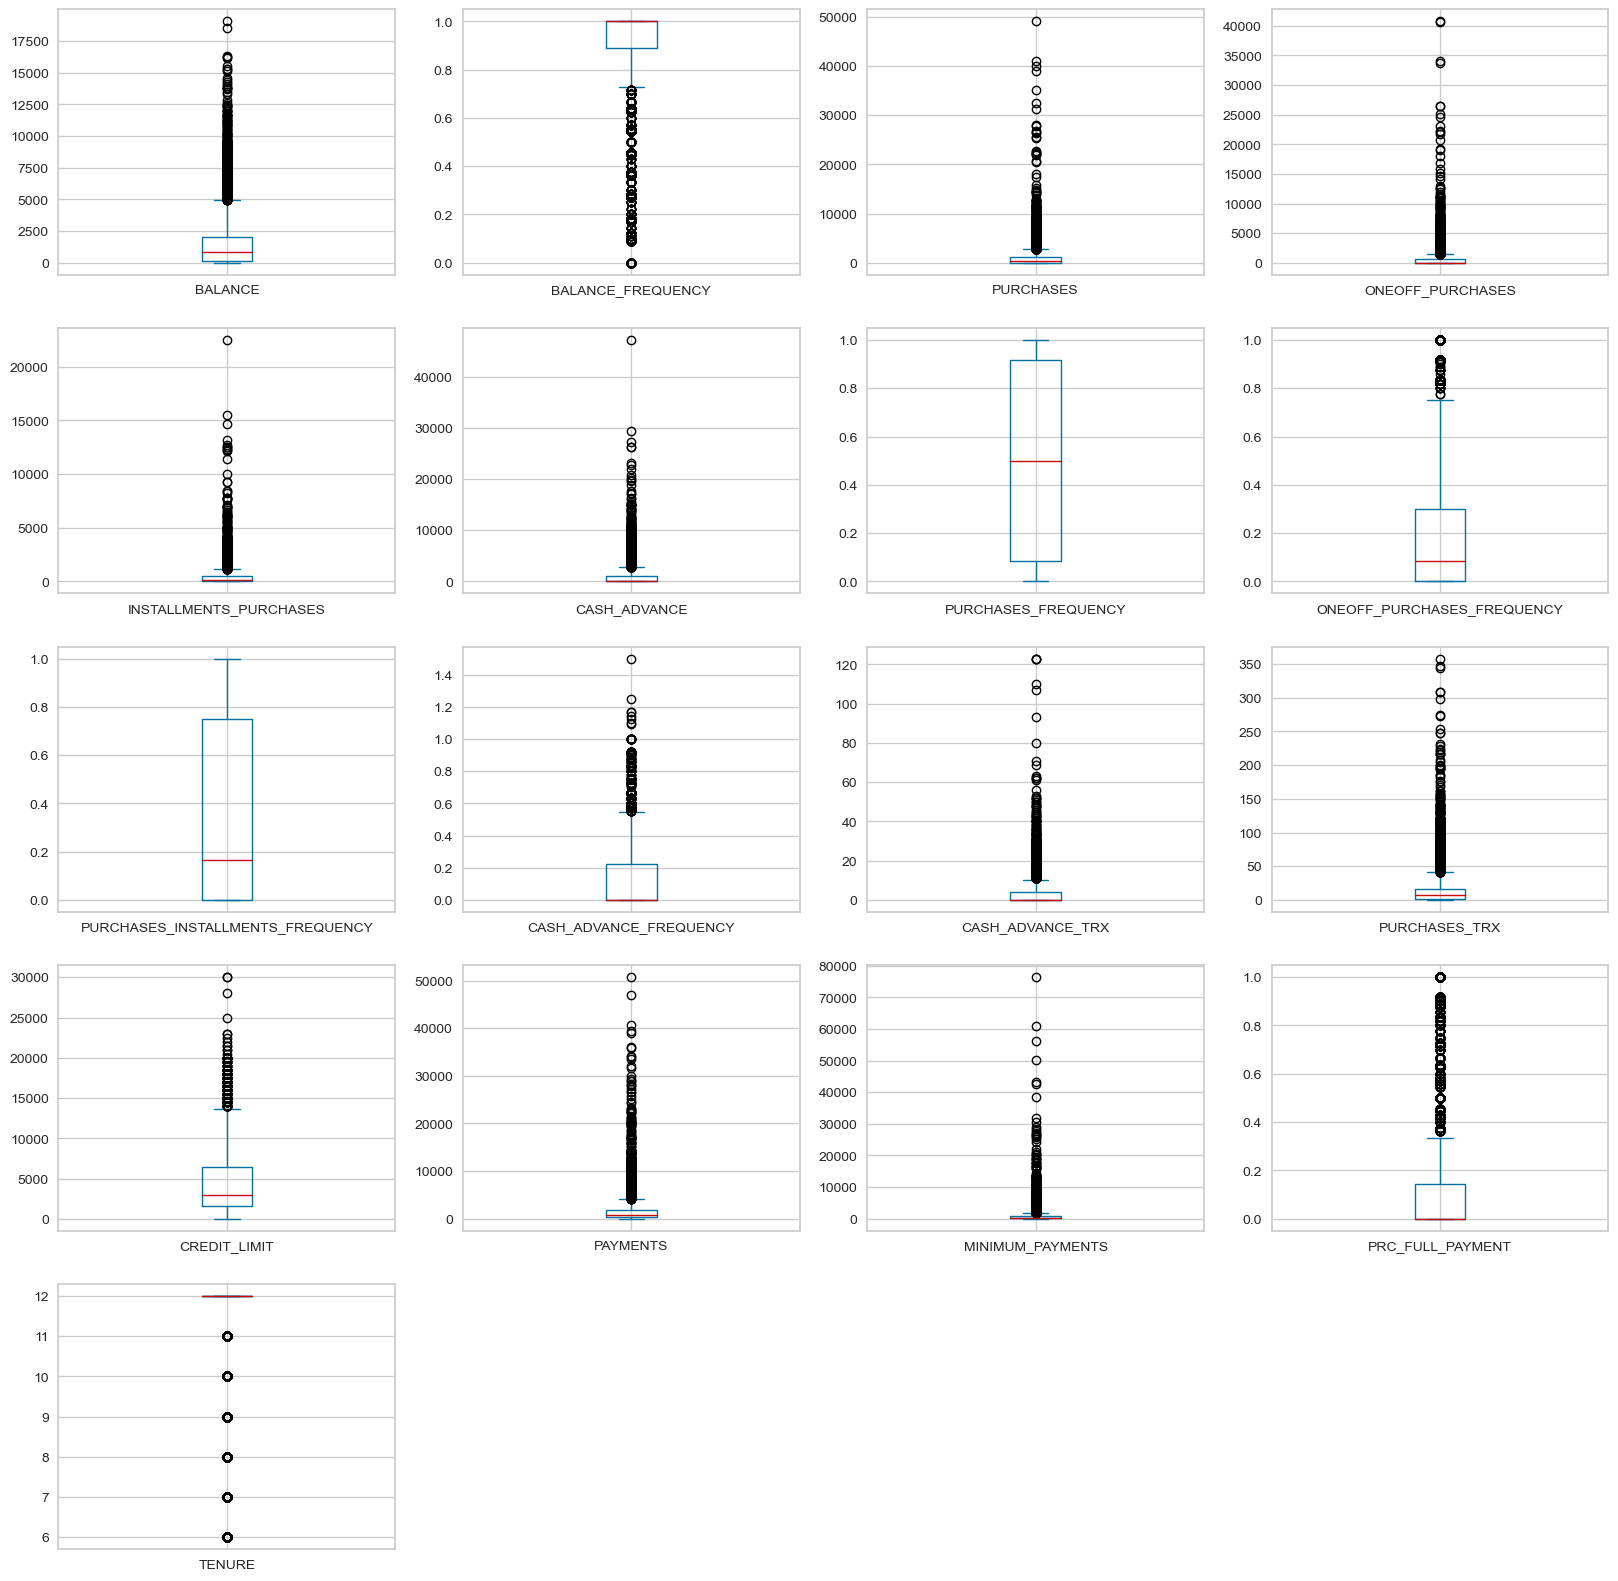

In [242]:
# Plot every column to see distributions and outliers.
df.plot(subplots=True, layout=(5, 4), figsize=(20, 20), kind='box', sharex=False, sharey=False)

## Preprocessing

### Missing Values

In [243]:
# Check for missing values, from high to low.
df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [244]:
313 / len(df)

0.034972067039106144

In [245]:
# As there are not manys missing values we will just drop them.
df.dropna(inplace=True)

## Categoricals columns

In [246]:
# Let's see how many categoricals columns we have.
df.select_dtypes(include=['object']).columns

Index(['CUST_ID'], dtype='object')

In [247]:
# Get rid of it.
df.drop('CUST_ID', axis=1, inplace=True)

## Dealing with Outliers

The data is dispersed with a long tail, for that we will apply log normal to numeric columns

In [248]:
# Apply log x + 1 transformation to every column that it's not frequency to deal with outliers.
# Apply it to columns that don't have "Frequency" in their name.
df.iloc[:, ~df.columns.str.contains('FREQUENCY')] = np.log1p(df.iloc[:, ~df.columns.str.contains('FREQUENCY')])


## Normalize.

Let's normalize the dataset, needed for many machine learning algorithms.

In [249]:
# Transform the dataset into a numpy array for use it for machine learning.
X = np.asarray(df)
X

array([[3.7353037 , 0.818182  , 4.5685062 , ..., 4.94527714, 0.        ,
        2.56494936],
       [8.07198907, 0.909091  , 0.        , ..., 6.97853076, 0.20067051,
        2.56494936],
       [7.82250437, 1.        , 6.65179149, ..., 6.44299355, 0.        ,
        2.56494936],
       ...,
       [3.19452875, 0.833333  , 4.97948857, ..., 4.42386854, 0.22314355,
        1.94591015],
       [2.67121774, 0.833333  , 0.        , ..., 4.03875482, 0.22314355,
        1.94591015],
       [5.92347494, 0.666667  , 6.99782448, ..., 4.49187781, 0.        ,
        1.94591015]])

In [250]:
# Create our scaler.
scale = StandardScaler()

# Scale the array.
X_scaled = scale.fit_transform(X)

# Check the shape of the array and compare with the original.
print("The dataset shape is {} and the array shape is {}.".format(df.shape, X_scaled.shape))

The dataset shape is (8636, 17) and the array shape is (8636, 17).


# Model

## Let's choose the number of cluster that we will use.

Elbow Method to determine the number of clusters to be formed:


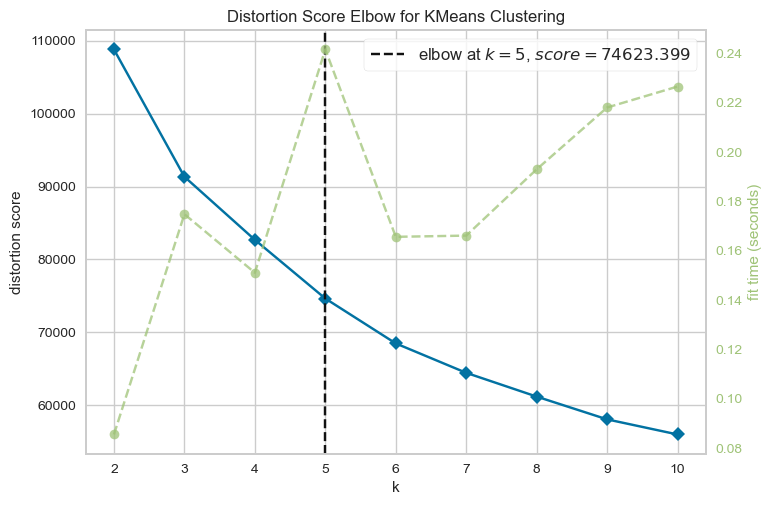

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [251]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(X_scaled)
Elbow_M.show()

## 6 clusters

In [256]:
# Let's do Kmean with 5 clusters.
kmeans_model = KMeans(n_clusters=5, random_state=42).fit(X_scaled)
labels = kmeans_model.labels_

In [257]:
# Let pass our model to the dataframe.
clusters = pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)

# Check our first 5 rows.
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,3.735304,0.818182,4.568506,0.000000,4.568506,0.000000,0.166667,0.000000,0.083333,0.00,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949,2.0
1,8.071989,0.909091,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.25,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949,1.0
2,7.822504,1.000000,6.651791,6.651791,0.000000,0.000000,1.000000,1.000000,0.000000,0.00,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949,3.0
4,6.707735,1.000000,2.833213,2.833213,0.000000,0.000000,0.083333,0.083333,0.000000,0.00,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949,4.0
5,7.501540,1.000000,7.196147,0.000000,7.196147,0.000000,0.666667,0.000000,0.583333,0.00,0.000000,2.197225,7.496097,7.244983,7.786654,0.000000,2.564949,3.0


## Profiling clusters

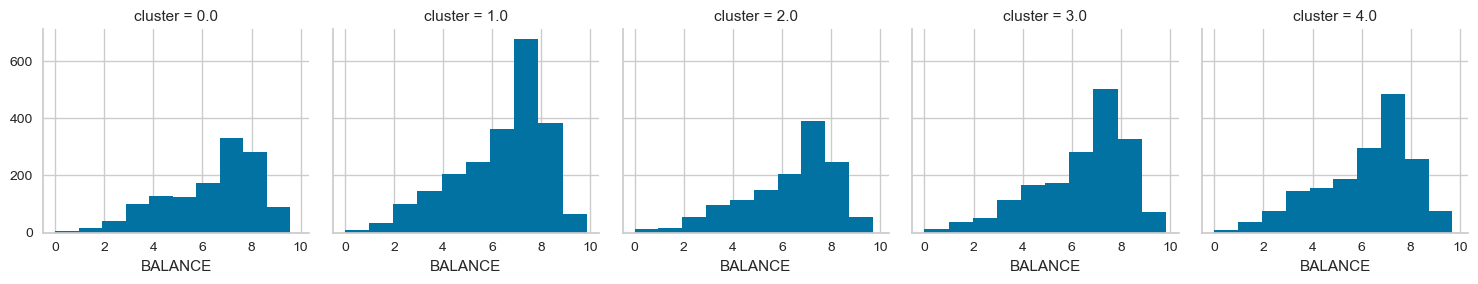

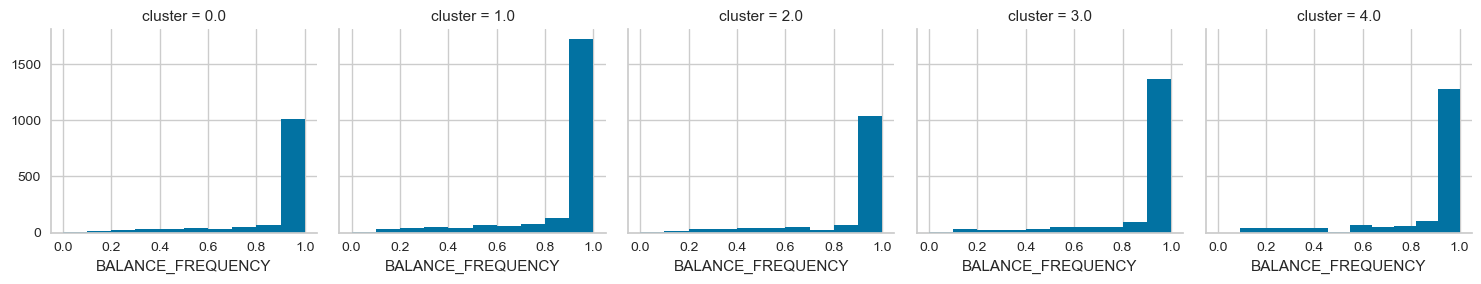

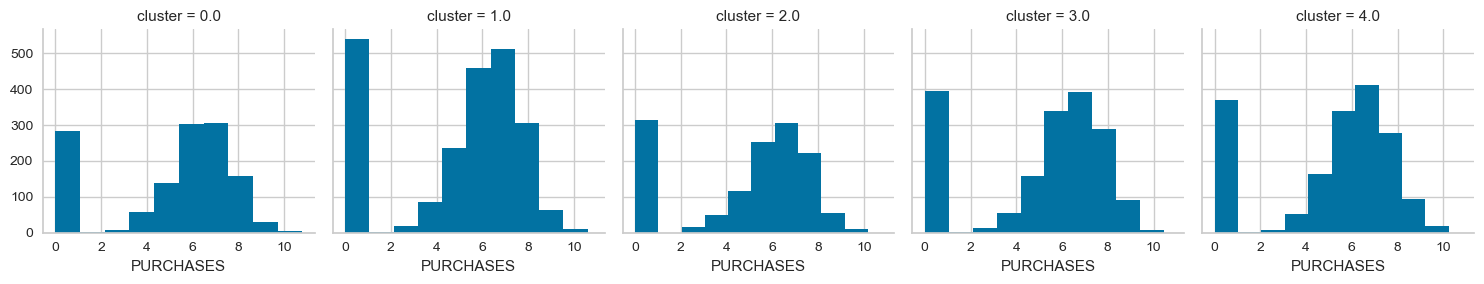

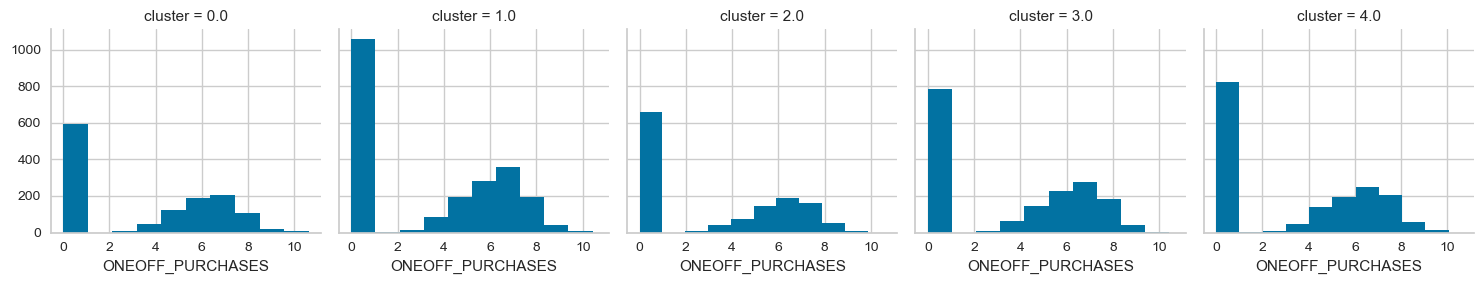

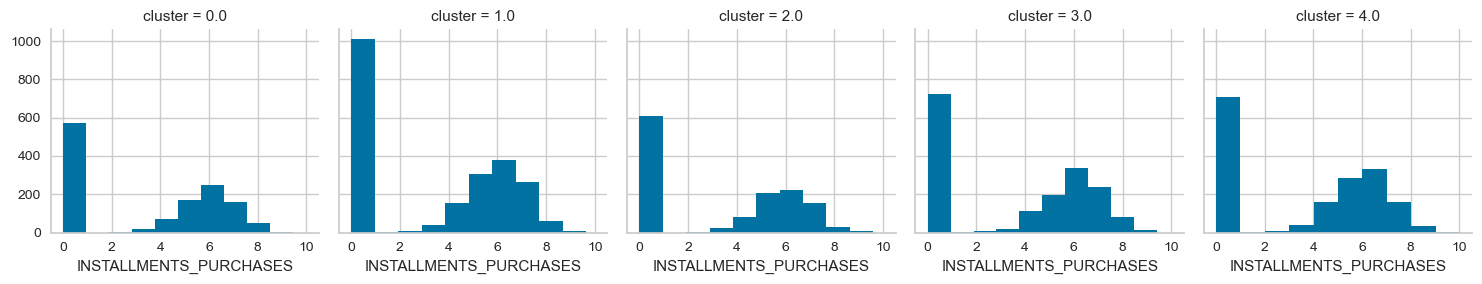

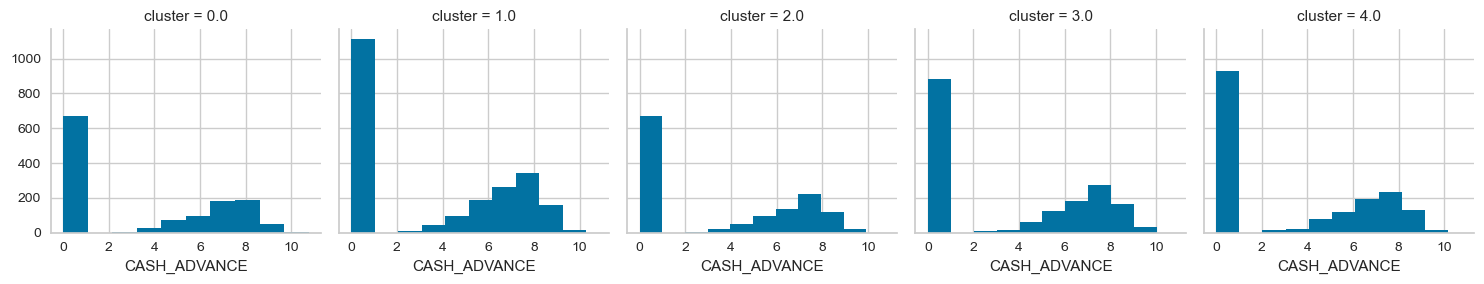

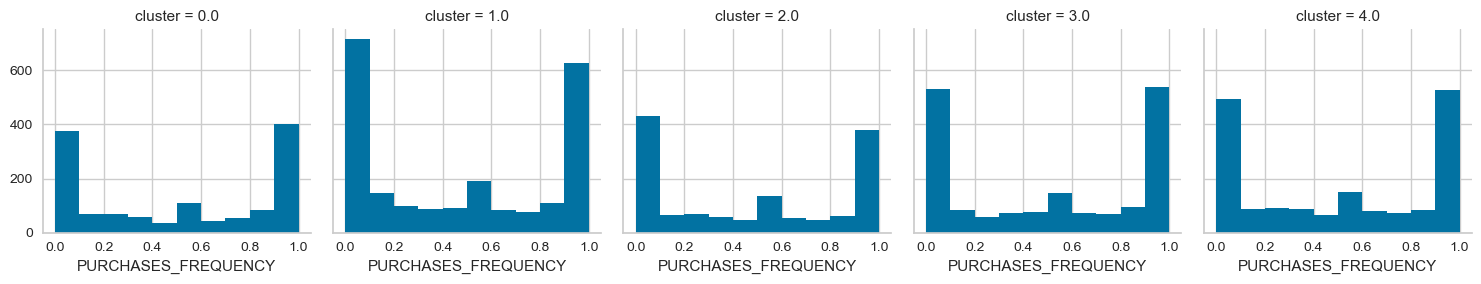

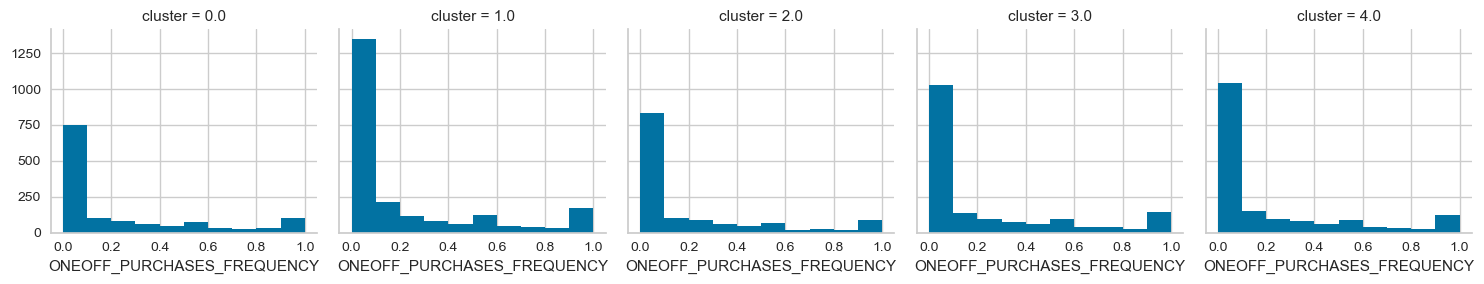

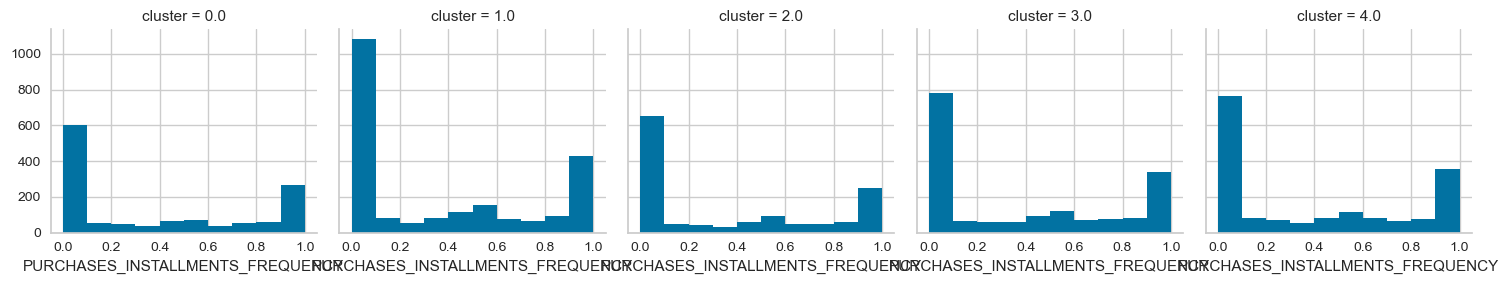

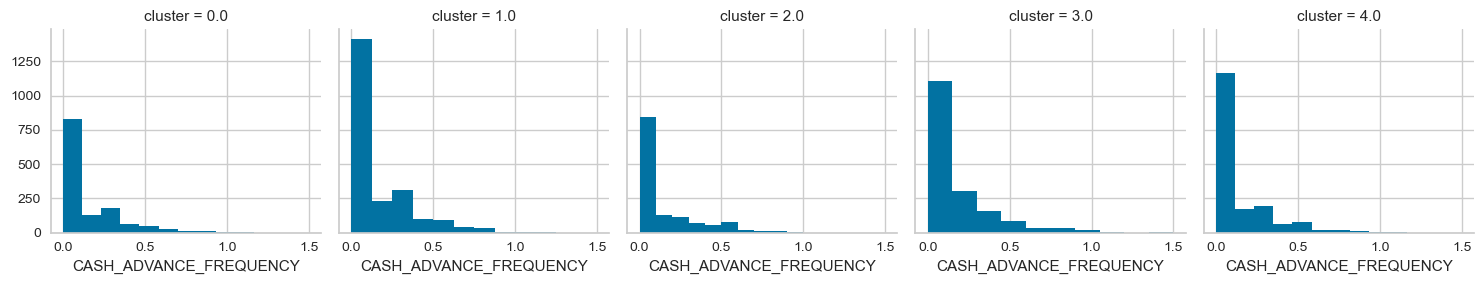

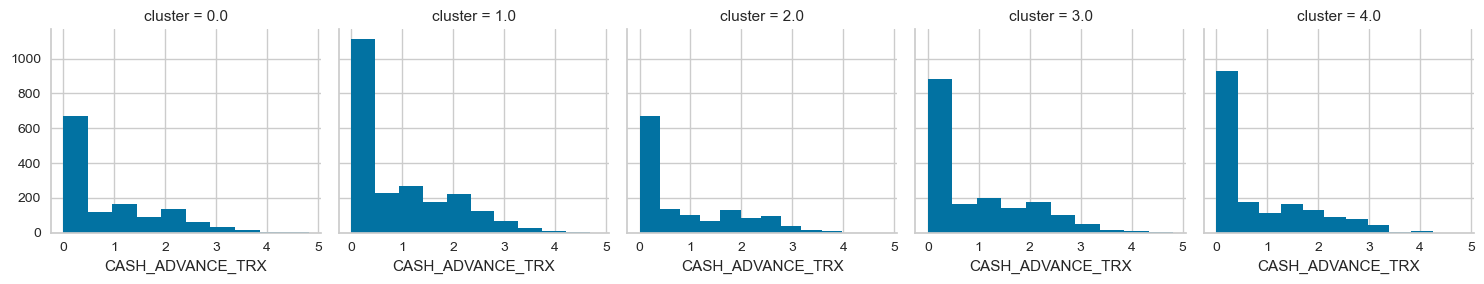

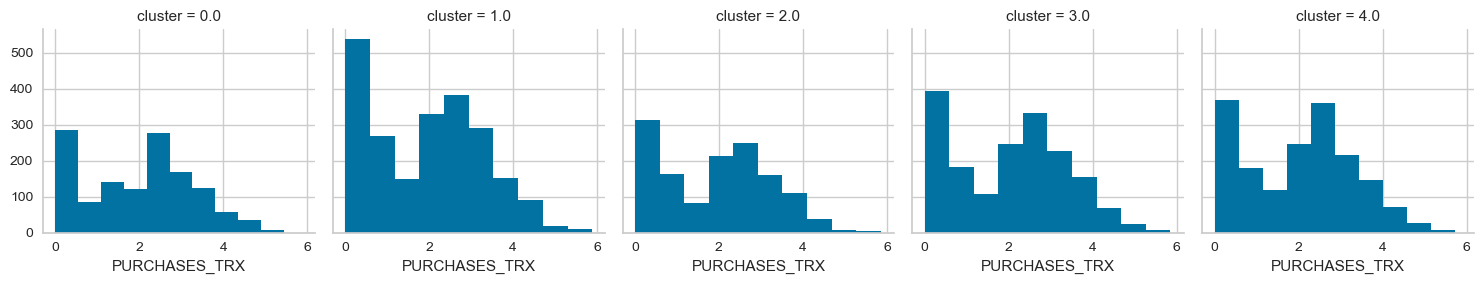

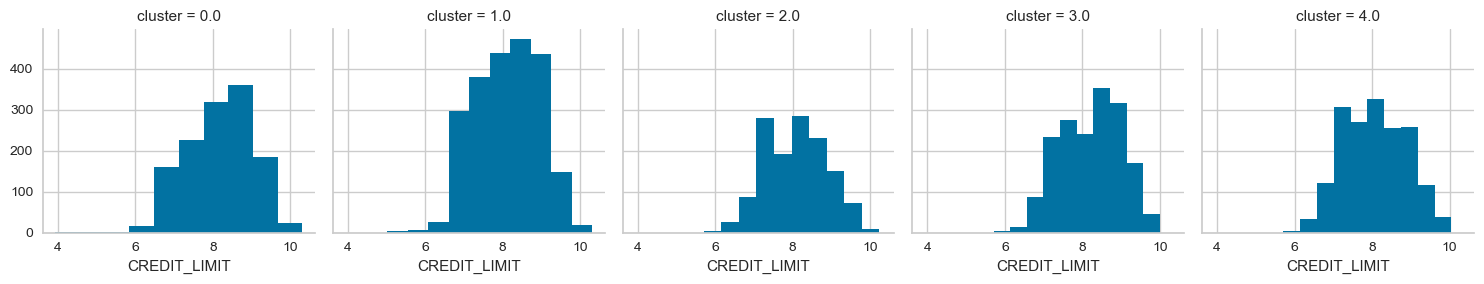

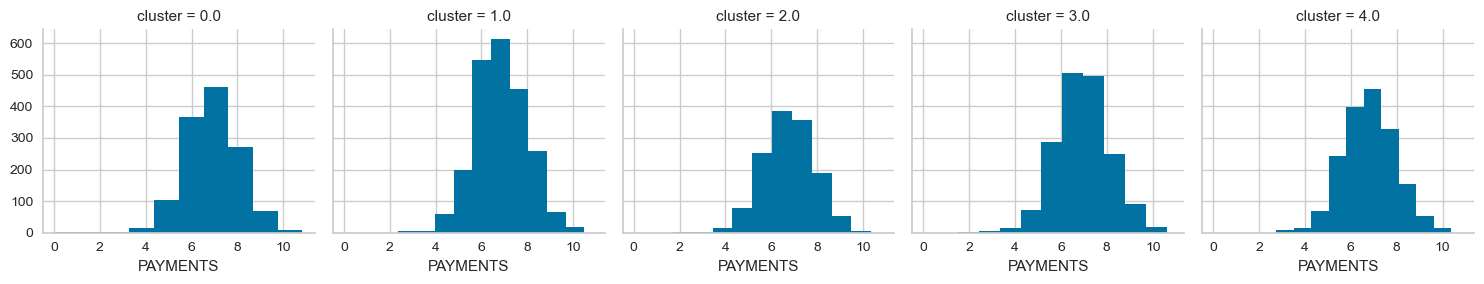

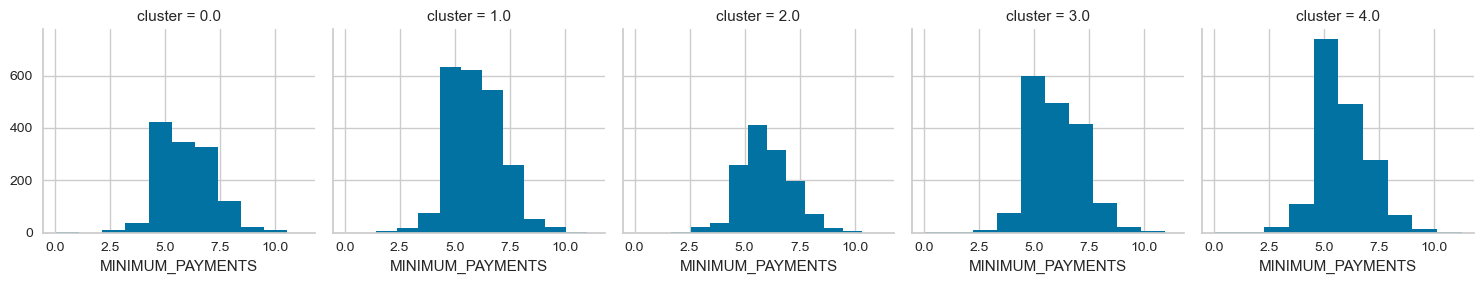

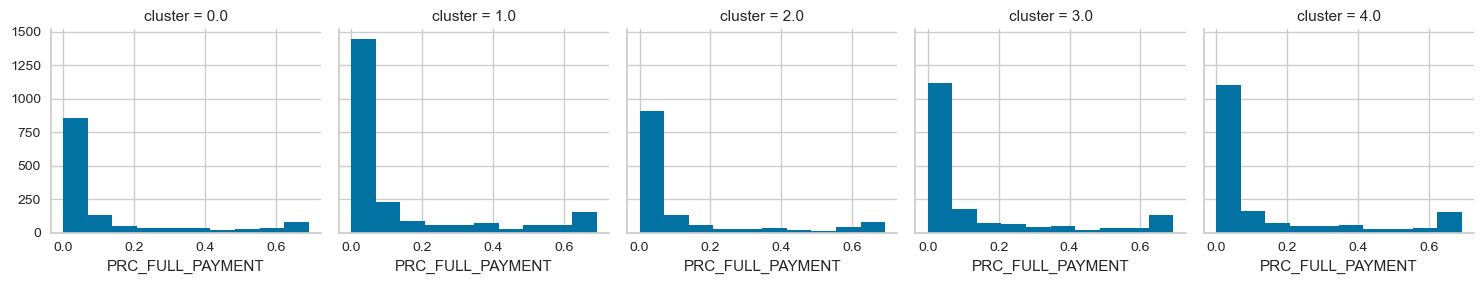

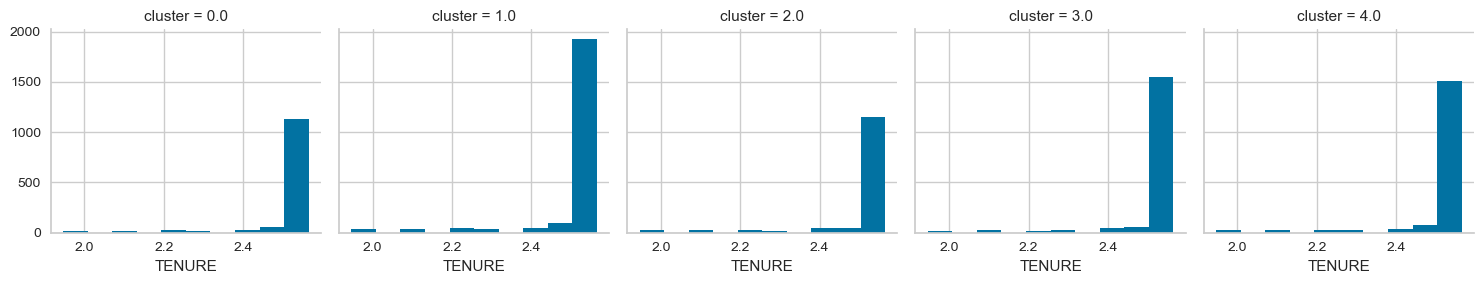

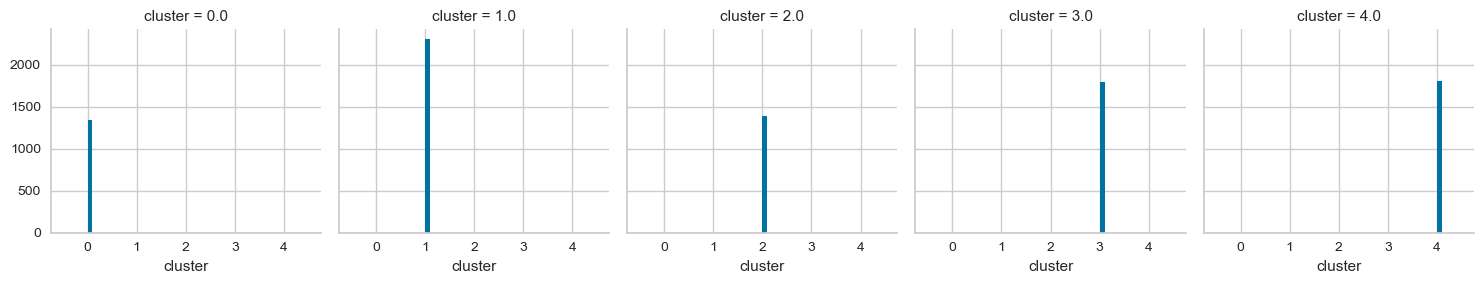

In [258]:
# Plot each variable for each cluster.
for c in clusters:
    grid = sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

# Cluster 0: People who use their credit card for purchases.

# Can't difference any cluster on it, for sure in the PCA graph we will see nothing clear, this analysis didn't end well. We have many outliers, and the result was the same when I tried with or without log(x+1) transformation.

## Visualization of Clusters

#### Using PCA to transform data to 2 dimensions for visualization

In [259]:
dist = 1 - cosine_similarity(X)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8636, 2)

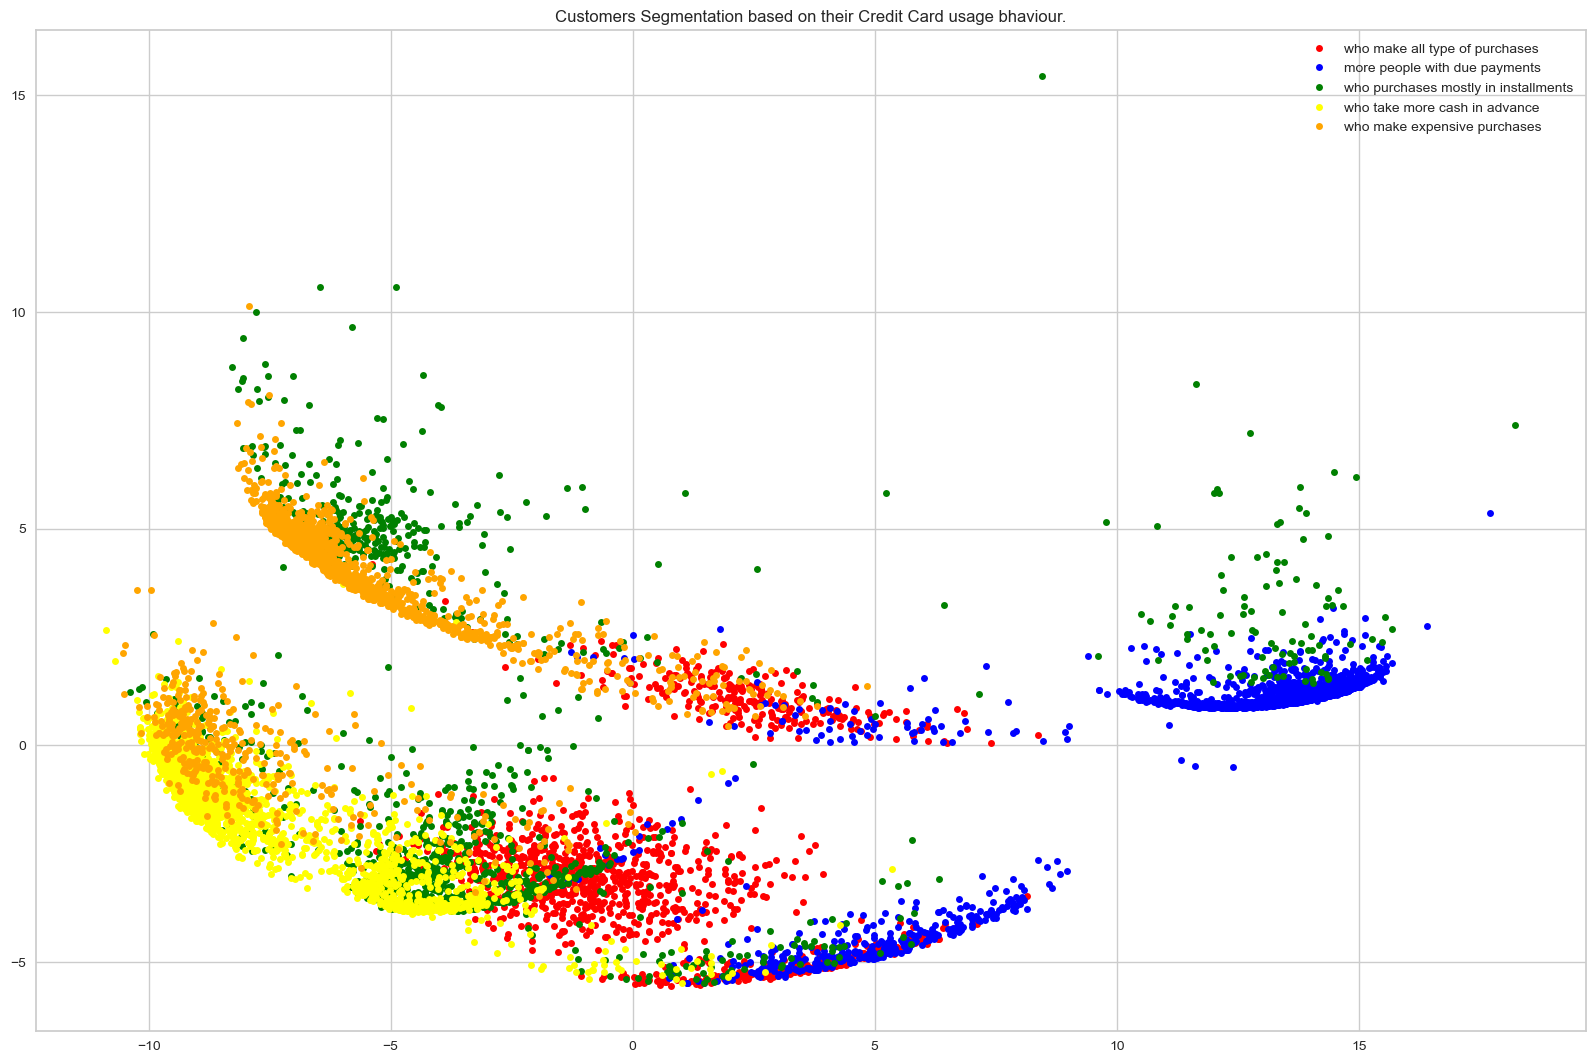

In [260]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple'}

names = {0: 'who make all type of purchases', 
         1: 'more people with due payments', 
         2: 'who purchases mostly in installments', 
         3: 'who take more cash in advance', 
         4: 'who make expensive purchases',
         5:'who don\'t spend much money'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()

In [261]:
# Same her, nothing clear that you can see on the graph.